In [1]:
from bing_image_downloader import downloader
# downloader.download("horse", limit=100, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)

# Computer Vision with Deep Learning

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


* hand written digits dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

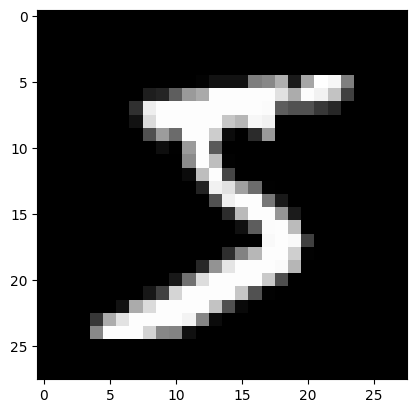

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0], cmap='gray')
plt.show()

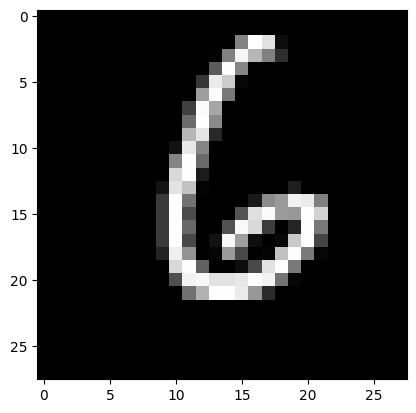

In [6]:
# 11
plt.imshow(train_images[32], cmap='gray')
plt.show()

In [7]:
train_labels[32]

6

## Normalize the data

In [8]:
# from sklearn.preprocessing import normalize, scale --- not needed
train_images = train_images / 255.0
test_images = test_images / 255.0

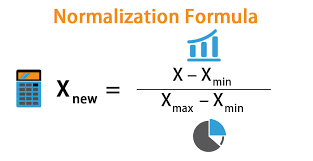

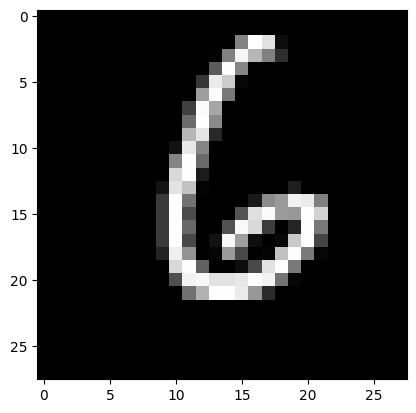

In [9]:
plt.imshow(train_images[32], cmap='gray')

# Convolutional Neural Networks - CNNs - Image Classification

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D,InputLayer, Reshape , BatchNormalization, Dropout


*  Flatten - 1D array: 28x28 -> 784
*  Dense - fully connected layer
*  Conv2D - convolutional layer: 2D array
*  MaxPooling2D - pooling layer: reduce dimensionality
*  InputLayer - input layer 
*  Reshape - reshape layer
* batch normalization is used to normalize the input layer by re-centering and re-scaling
* dropout is used to prevent overfitting

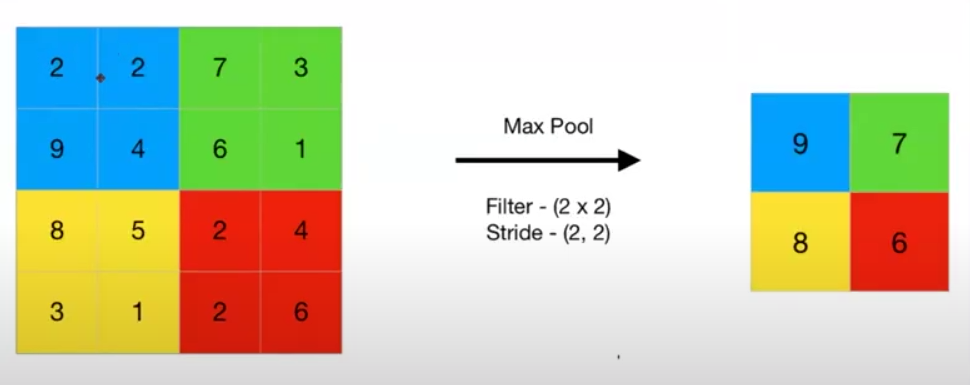

 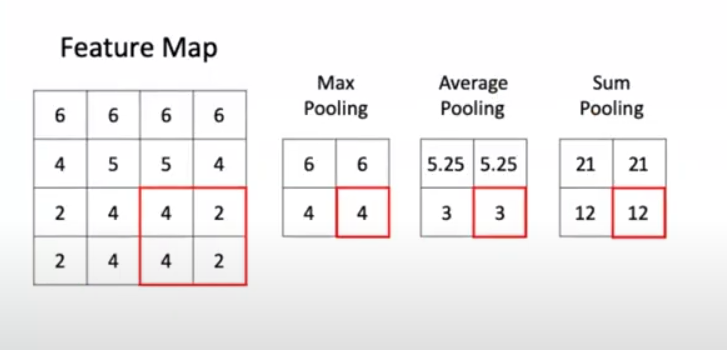

In [11]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu')) # LSTM : Long Short Term Memory , RNN - Recurrent Neural Network
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) # 10 different answers

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

c:\Users\bugra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


* kernel size is the size of the filter. 3x3 is a common size.
* pool size is the size of the pooling window. 2x2 is a common size.


In [12]:
# model = Sequential([
#     InputLayer(input_shape=(28, 28)),
#     Reshape(target_shape=(28, 28, 1)),
#     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


* another technique

In [13]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10


c:\Users\bugra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8740 - loss: 0.4433 - val_accuracy: 0.9752 - val_loss: 0.0958
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9739 - loss: 0.0923 - val_accuracy: 0.9828 - val_loss: 0.0701
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0633 - val_accuracy: 0.9847 - val_loss: 0.0623
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9852 - loss: 0.0493 - val_accuracy: 0.9847 - val_loss: 0.0579
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9878 - loss: 0.0415 - val_accuracy: 0.9837 - val_loss: 0.0575
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9835 - val_loss: 0.0611
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9853 - val_loss: 0.0588
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9917 - loss: 0.0266 - val_ac

In [14]:
loss , accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0814


In [15]:
accuracy

0.9811999797821045

In [16]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

# Model Save    


In [17]:
model.save("my_model.h5")

# How to increase model accuracy
* Increase 
  * Number of layers
  * Number of neurons
* Add
  * Dropout layer (model.add(Dropout(.25))) # reduce overfitting
* Use
  * Batch-normalization

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(BatchNormalization())
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu')) # LSTM : Long Short Term Memory , RNN - Recurrent Neural Network
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10 different answers

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9158 - loss: 0.2843 - val_accuracy: 0.9725 - val_loss: 0.1191
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9777 - loss: 0.0720 - val_accuracy: 0.9808 - val_loss: 0.1009
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9838 - val_loss: 0.0795
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9833 - val_loss: 0.0799
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9775 - val_loss: 0.1322
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9907 - loss: 0.0274 - val_accuracy: 0.9837 - val_loss: 0.0965
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9917 - loss: 0.0240 - val_accuracy: 0.9847 - val_loss: 0.1192
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9926 -

In [20]:
loss , accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9790 - loss: 0.1410


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


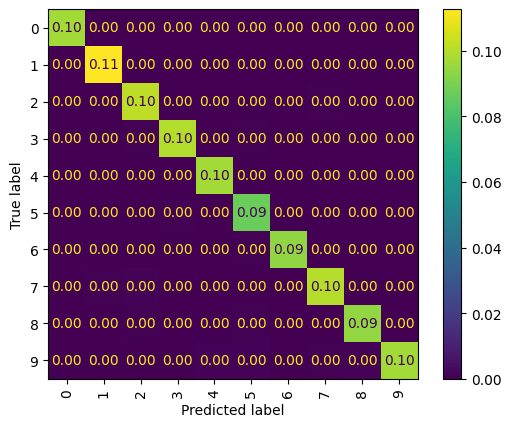

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

ConfusionMatrixDisplay.from_predictions(test_labels, predictions, display_labels=np.arange(10), xticks_rotation='vertical', colorbar=True,normalize="all",values_format=".2f")
plt.show()



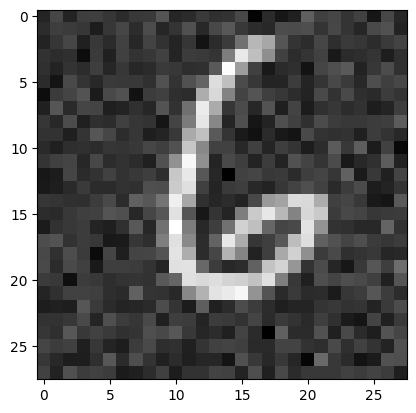

In [22]:
#add noise to the images
np.random.seed(42)
train_images_noisy = train_images + np.random.normal(0, 0.1, train_images.shape)
test_images_noisy = test_images + np.random.normal(0, 0.1, test_images.shape)

plt.imshow(train_images_noisy[32], cmap='gray')
plt.show()


In [23]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9850 - val_loss: 0.1092
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9860 - val_loss: 0.1014
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9949 - loss: 0.0177 - val_accuracy: 0.9847 - val_loss: 0.1223
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.9929 - loss: 0.0255 - val_accuracy: 0.9853 - val_loss: 0.1005
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9857 - val_loss: 0.0854
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9952 - loss: 0.0174 - val_accuracy: 0.9860 - val_loss: 0.1027
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.9853 - val_loss: 0.1120
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9951 -

In [24]:
loss , accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9753 - loss: 0.2067
